# Required assignment 3.1-Monte Carlo simulations

The Monty Hall problem is a well-known probability puzzle inspired by the game show Let’s Make a Deal, hosted by Monty Hall.

In the game show, you’re presented with three doors. Behind one is a car; behind the other two, goats. You pick a door, hoping for the car. Monty, who knows what’s behind each door, opens one of the remaining two to reveal a goat. He then gives you a choice: stick with your original door or switch to the other unopened one.

What should you do? Stay or switch?

Let’s simulate this scenario in Python to find out.

In [7]:
#import necessary libraries

import numpy as np
import random
from random import randrange
from matplotlib import pyplot as plt

## The original Monty Hall game

### Step 1: Construct three 'imaginary' doors, one with a car behind and not known to the player

#### Question 1: Get the player's input about their choice of door

- Store the selected door in a variable called `picked_door`. 

- Remove the `picked_door` from the list of `doors`.


In [8]:
###GRADED
# Write the logic for picking one door and removing it

#Randomly placing the car
#player choosing a door randomly
#Removing that door from the avaiable options

picked_door = None
winning_door = randrange(3)
random.seed(23) # Set the random number generator 
doors = [0,1,2] # Represents the three doors

# YOUR CODE HERE

picked_door = random.choice(doors) # Player choosing one door randomly
doors.remove(picked_door) # Remove that door from the available options

print("You picked door\n", str(picked_door) + ".")
print("The remaining doors are therefore:\n", doors)


You picked door
 1.
The remaining doors are therefore:
 [0, 2]


The `reveal_empty_door()` function simulates the game show host’s action in the Monty Hall problem by revealing a non-winning door. It ensures the host never opens the door hiding the prize, reflecting the host’s knowledge and intentional behaviour. This is essential for accurately modelling the decision-making dynamics and outcomes of the Monty Hall scenario.

In [9]:
def reveal_empty_door(doors, winning_door):
    """
    The host knows which door is winning, so opens one of the empty doors!
    """
    sample_from = [] #Host cannot open the door that is the winning door. 
    #So the host has 1 or 2 candidate doors.
    
    if len(doors) != 2:
        print("There is an issue!")
        return None
    else: 
        # Check the first remaining door
        if doors[0] != winning_door: # If first door is NOT winning door (it has a goat)
            sample_from.append(doors[0]) # Add it to the list of doors Monty can open

        # Check the second remaining door
        if doors[1] != winning_door: # If 2nd door is NOT winning door (it has a goat)
            sample_from.append(doors[1]) # Add it to the list of doors Monty can open
           
    # Monty randomly chooses one from the valid options (will always be a goat)
    return random.choice(sample_from)

The host reveals an empty door, removes it from the available choices and identifies the remaining unopened door, which is the contestant's alternative if they choose to switch. This step is central to the decision-making process in the Monty Hall problem.

In [10]:
# Call the reveal_empty_door function to get which door Monty opens
open_door = reveal_empty_door(doors, winning_door)

print("The host reveals door\n", open_door) # Print which door Monty revealed

doors.remove(open_door) # Remove the opened door from the list of available doors

# Identify the single remaining unopened door (the switch option)
remaining_door = doors[0] # Since 'doors' now only contains one element


The host reveals door
 2


The contestant is reminded of their initial choice and given the option to switch to the other unopened door, highlighting the critical decision point in the Monty Hall problem.

In [11]:
# Remind the contestant of their initial choice and the switch option
print("You initially picked door:\n", picked_door, "but you can switch to door:\n", remaining_door)


You initially picked door:
 1 but you can switch to door:
 0


The contestant chooses whether to switch doors or stay with the original selection. If `yes_no` is 'yes', the choice is updated to the other unopened door. Otherwise, the original choice is retained. A message is printed indicating the contestant's final selection.

In [12]:
yes_no = 'yes'  # Change to 'no' if you want to keep the original door

if yes_no == "yes":
    print("You switched to door:\n", remaining_door)
    picked_door = remaining_door # Update the contestant's choice to the new door if YES SWITCH
else:
    print("You keep your door:\n", picked_door) # picked_door remains the same, if NO SWITCH


You switched to door:
 0


In [13]:
# --- Determining the Win/Loss ---
print("Let's see if we won:\n(True means you are the winner!)\n")
print(picked_door == winning_door) # Compares final chosen door with the winning door

Let's see if we won:
(True means you are the winner!)

True


### Step 2: Run the simulation function, which returns 1 for a win and 0 otherwise

The `simulate_round()` function runs a single Monty Hall game round. The contestant selects a door, the prize is randomly placed and the host reveals a non-winning door. Based on the contestant's decision to switch or stay (`yes_no`), the function returns 1 for a win and 0 for a loss.


In [14]:
def simulate_round(picked_door, yes_no):
    """
    Inputs: picked_door (0 1 or 2), decision of switching the door ("yes" or "no")
    Returns: whether or not we win the prize (1: win, 0: lose)
    """
    
    # 1. Initialise the full set of doors for THIS round. This list is LOCAL to the function.
    doors = [0,1,2]

    # 2. Randomly places the car for THIS round.
    winning_door = randrange(3) # it can be 0, 1, or 2! We don't know yet.
    
    # 3. Simulates the player's initial choice and removes it from the LOCAL 'doors' list.
    doors.remove(picked_door)  # 'doors' now contains only 2 doors excluding initial player choice
    
    # 4. Monty reveals a goat door. The 'doors' list how contains only the 2 unpicked doors.
    open_door = reveal_empty_door(doors, winning_door)
    
    # 5. Remove from LOCAL 'doors list the revealed goat door
    doors.remove(open_door)

    # 6. The single remaining door in the 'doors' list is the switch option.
    remaining_door = doors[0]

     # 7. Player decides to switch or stick.
    if yes_no == "yes":  #If YES switching, update 'picked_door' to the 'remaining_door'.
        picked_door = remaining_door # If sticking (NO), 'picked_door' retains initial value 
                                    #(the one passed into the function).
    
    # 8. Return 1 for a win, 0 for a loss.
    return int(picked_door == winning_door)


## Step 3: Simulate player's decisions

The Monty Hall game is simulated 30,000 times with the contestant always choosing door 1 and never switching. Each round's outcome is recorded, and the cumulative win ratio is calculated to show how the winning percentage evolves over time.



In [15]:
picked_door = 1 #fix a door (0,1, or 2)
yes_no = "no" #let's start with the strategy of keeping our door!
simulate = 30000 #number of times to simulate

# Start an array to store the win/loss (1 or 0) for each simulation round
results = np.zeros(simulate) #a lot of zeros

# Loop through the desired number of simulations
for i in range(simulate):
    # Run a single round of the game with the fixed picked_door and "no" (stick) strategy
    results[i] = simulate_round(picked_door, yes_no)
    
# Calculate the cumulative win ratio
ratios = np.cumsum(results) / (np.arange(1,simulate+ 1))
# np.cumsum(results) gives a running total of wins
# np.arange(1, simulate + 1) creates an array [1, 2, 3, ..., 30000] for division
# This calculates the win ratio after 1 round, then after 2, etc., up to 30000 rounds


The plot displays the first 3,000 rounds of Monty Hall simulations where the contestant does not switch doors. The x-axis represents the number of rounds played, and the y-axis shows the cumulative win percentage. A dashed horizontal line at 1/3 indicates the theoretical probability of winning by staying with the initial choice.

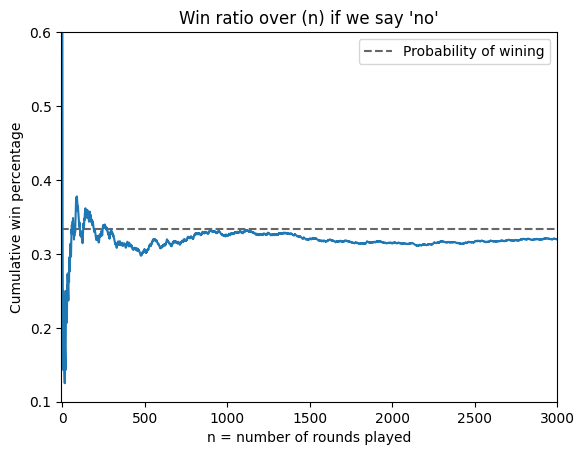

In [16]:
plot_limit = 3000 #plot how the ratio changes oby increasing $n$
x = np.arange(1, plot_limit + 1) # Creates the x-axis values (number of rounds)
y = ratios[:plot_limit] # Selects the cumulative win percentages for the first 'plot_limit' rounds

plt.title(r"Win ratio over (n) if we say 'no'") # Sets the title of the plot
plt.xlabel("n = number of rounds played") # Labels the x-axis
plt.ylabel(r"Cumulative win percentage") # Labels the y-axis

# Adds a horizontal dashed line at y=1/3 (the theoretical win probability for sticking)
plt.axhline(y = 1/3, color = 'k', linestyle='--', alpha = 0.6, label = r"Probability of wining")

plt.plot(x,y) # Plots the cumulative win percentage over the number of rounds
plt.xlim(-5,plot_limit) # Sets the limits for the x-axis
plt.ylim(0.1,0.6) # Sets the limits for the y-axis
plt.legend() # Displays the legend for the horizontal line
plt.show() # Shows the plot

The plot shows the observed win ratio gradually converging toward the expected value, with axis limits adjusted to highlight the 10 per cent to 60 per cent win rate range for clarity.

#### Question 2: Simulate the decisions for the following situation

If `picked_door` is 2 and the user chooses to switch (`yes_no` = 'yes'), run the simulation for 10,000 iterations.

In [17]:
### GRADED
picked_door = 2 # Fixed initial door choice
yes_no = "yes"  # Strategy: always switch
simulate = 10000 # Number of iterations

### YOUR SOLUTION HERE
# YOUR CODE HERE
#raise NotImplementedError()
results = np.zeros(simulate) # Start array to store win/loss outcomes (1 for win, 0 for loss)

# Run one round of simulation
for i in range(simulate):
    results[i] = simulate_round(picked_door, yes_no) 

# Calculate cumulative win ratio
ratios = np.cumsum(results) / (np.arange(1, simulate + 1)) 


The simulations for Question 2 are plotted below. 

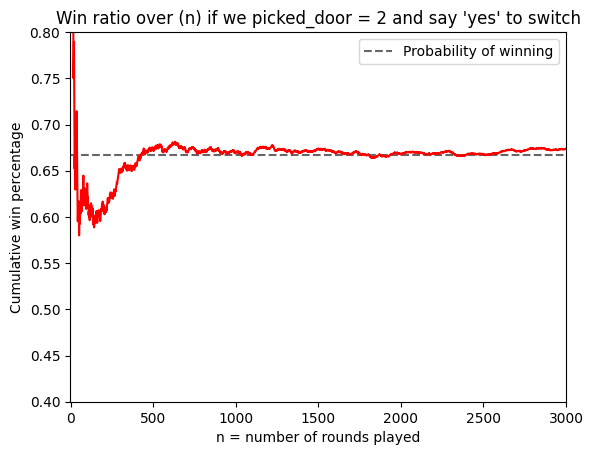

In [18]:
plot_limit = 3000 # This will plot the first 3000 rounds for clarity
x = np.arange(1, plot_limit + 1)
y = ratios[:plot_limit] # Uses the first 3000 ratios from our 'ratios' calculation

plt.title(r"Win ratio over (n) if we picked_door = 2 and say 'yes' to switch")
plt.xlabel("n = number of rounds played")
plt.ylabel(r"Cumulative win percentage")

# This time the line is at y=2/3 - Because if you switch your overall probability of winning is 2/3.
plt.axhline(y = 2/3, color = 'k', linestyle='--', alpha = 0.6, label = r"Probability of winning")

plt.plot(x,y, color='r') # Plots the simulated win ratio
plt.xlim(-5,plot_limit)
plt.ylim(0.4,0.8) # Adjusted y-limits to better show convergence around 2/3
plt.legend()
plt.show()

## Modification of the game

Each time the host offers you the option to switch doors, you flip a biased coin with probability $\theta$ of landing on 'H'. If it lands on 'H', you switch; otherwise, you stick with your original choice.

In [19]:
def simulate_with_coins(picked_door, theta):
    """
    Inputs: picked_door (0 1 or 2), decision of switching the door ("yes" or "no")
    Returns: whether or not we win the prize (1: win, 0: lose)
    """
    doors = [0,1,2] # Starts the doors for the round
    winning_door = randrange(3) # Place the car randomly
    
    # Simulate player's initial pick by removing it from the LOCAL doors list
    doors.remove(picked_door)
   
    # Monty reveals a Goat door
    open_door = reveal_empty_door(doors, winning_door)

    # Remove the opened door from LOCAL doors list
    doors.remove(open_door)
    
    # Identify the single remaining unopened door
    remaining_door = doors[0]
   
    # Simulate the biased coin flip (some times switch some times dont)
    flip = np.random.uniform(0,1) # Generates a random float between 0.0 and 1.0

    # Decision based on the coin flip and theta
    if flip <= theta:
        # If the random 'flip' value is less than or equal to 'theta', it's like landing on 'H' YES
        picked_door = remaining_door  #SWITCH
    else: # Otherwise, it's like landing on 'T' NO 
        # picked_door = picked_door  # This line is redundant, as picked_door is already the original choice.
        pass # No change to picked_door if sticking
    
   # Determine win/loss
    return int(picked_door == winning_door)

#### Question 3: Show the probability of winning using this strategy as a function of $\theta$.

If $\theta = 0.6$, write the logic for selecting a door using the `simulate_with_coins` function, and compute the value of ratios.

Hint: Follow the same approach as in Question 2, using `picked_door = 1` and `simulate = 30,000`.

In [20]:
###GRADED

picked_door = 1 # The door the contestant chooses at the start
theta = 0.6 # The probability (from 0.0 to 1.0) that the contestant will CHOOSE TO SWITCH (loaded)
simulate = 30000  # The total number of times to run the Monty Hall game.
###YOUR SOLUTION HERE

# YOUR CODE HERE

# start a NumPy array to store the result of each game round (1 for win / 0 for loss)
results = np.zeros(simulate) # Creates an array of 30,000 zeros initially.

# Run the simulation for the simulate number of times
for i in range(simulate):
    # Call the 'simulate_with_coins' function (one full game) for each round. Adds the 'theta' strategy.
    # It returns 1 (win) or 0 (loss), which is stored in the 'results' array.
    results[i] = simulate_with_coins(picked_door, theta)

# Calculate the cumulative win ratio over time
ratios = np.cumsum(results) / (np.arange(1, simulate + 1))
# np.cumsum(results): Calculates a running total of wins
# np.arange(1, simulate + 1): Creates an array of numbers from 1 to 'simulate'
# Dividing cumsum by this array gives the win percentage after each consecutive round
ratios = np.cumsum(results) / (np.arange(1, simulate + 1))

# Print the final simulated win fraction, the overall win percentage after completing all 'simulate' rounds
print("We win with a", ratios[-1], "fraction of the time!")

We win with a 0.5312666666666667 fraction of the time!


Imagine this:

- You’re playing a modified version of the Monty Hall game.

- You start with £5. Each round costs £1 to play.

- If you pick the winning door, you earn £2 (recovering your £1 and gaining a £1 profit). If you lose, you forfeit the £1.

- Your strategy: switch doors based on a coin flip. If a random number between 0 and 1 is less than or equal to $\theta$, you switch; otherwise, you stick with your original choice.

In [22]:
def reveal_empty_door(doors, winning_door):
    options = []
    for k in doors:
        if k != winning_door:
            options.append(k)
    return random.choice(options)

def simulate_round(picked_door, theta):
    """
    Inputs: picked_door (0 1 or 2), decision of switching the door ("yes" or "no")
    Returns: whether or not we win the prize (1: win, 0: lose)
    """
    doors = [0,1,2]
    winning_door = random.randrange(3) # it can be 0, 1, or 2! We don't know the truth yet.
    doors.remove(picked_door)
    open_door = reveal_empty_door(doors, winning_door)
    doors.remove(open_door)
    remaining_door = doors[0]
    flip = np.random.uniform(0,1)
    if flip <= theta:
        picked_door = remaining_door

    return int(picked_door == winning_door)

def simulate_with_coins(picked_door, theta):
    """
    Inputs: picked_door (0 1 or 2), decision of switching the door ("yes" or "no")
    Returns: whether or not we win the prize (1: win, 0: lose)
    """
    doors = [0,1,2]
    winning_door = random.randrange(3) # it can be 0, 1, or 2! We don't know the truth yet.
    doors.remove(picked_door)
    open_door = reveal_empty_door(doors, winning_door)
    doors.remove(open_door)
    remaining_door = doors[0]
    flip = np.random.uniform(0,1)

    if flip <= theta:
        picked_door = remaining_door

    return int(picked_door == winning_door)

def survival_probability(theta, num_rounds, num_simulations):
    """
    Simulates the Monty Hall game and estimates the probability of survival.

    Args:
        theta (float): Probability threshold for switching doors.
        num_rounds (int): Number of rounds to simulate.
        num_simulations (int): Number of simulation runs.

    Returns:
        float: Estimated probability of survival.
    """
    survival_count = 0
    for _ in range(num_simulations):
        money = 5
        for _ in range(num_rounds):
            money -= 1  # Pay to play
            if money <= 0:
                break
            picked_door = random.randint(0, 2)
            if simulate_with_coins(picked_door, theta):
                money += 2  # Win £2 (profit of £1)
        if money > 0:
            survival_count += 1

    survival_probability =  survival_count / num_simulations
    print(f"Estimated survival probability: {survival_probability:.4f}")
    return survival_probability


#### Question 4: Estimate the `survival_probability` when `theta = 0.4`, `num_rounds = 10` and `num_simulations = 10000`

In [23]:
###GRADED

# Parameters
theta = 0.4 # The probability threshold for switching doors in each round (40%)
num_rounds = 10 # number of rounds each 'player' will attempt to complete (a player may run out of money)
num_simulations = 10000 # Law of large numbers

### YOUR SOLUTION HERE

# YOUR CODE HERE
#raise NotImplementedError()
# Call the 'survival_probability' function (has the logic of the modified game)
estimated_survival_prob = survival_probability(theta, num_rounds, num_simulations)
# returns the fraction of times a 'player' successfully completed all 'num_rounds' (not loosing all money)

# Print the final estimated survival probability (4 decimal for precision)
print(f"Estimated survival probability: {estimated_survival_prob:.4f}")

Estimated survival probability: 0.7620
Estimated survival probability: 0.7620
